In [9]:
import os
import pickle5 as pickle
import json
import utils
import numpy as np
import pandas as pd
import pyarrow as pa
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

from tqdm import tqdm

from sherlock import helpers
from sherlock.deploy.model import SherlockModel
from sherlock.functional import extract_features_to_csv
from sherlock.features.paragraph_vectors import initialise_pretrained_model, initialise_nltk
from sherlock.features.preprocessing import (
    extract_features,
    convert_string_lists_to_lists,
    prepare_feature_extraction,
    load_parquet_values,
)
from sherlock.features.word_embeddings import initialise_word_embeddings

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize Sherlock Model

In [2]:
prepare_feature_extraction()
initialise_word_embeddings()
initialise_pretrained_model(400)
initialise_nltk()

Preparing feature extraction by downloading 4 files:
        
 ../sherlock/features/glove.6B.50d.txt, 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy,
        
 ../sherlock/features/par_vec_trained_400.pkl.trainables.syn1neg.npy, and 
 ../sherlock/features/par_vec_trained_400.pkl.wv.vectors.npy.
        
All files for extracting word and paragraph embeddings are present.
Initialising word embeddings
Initialise Word Embeddings process took 0:00:03.619752 seconds.
Initialise Doc2Vec Model, 400 dim, process took 0:00:01.644073 seconds. (filename = ../sherlock/features/par_vec_trained_400.pkl)
Initialised NLTK, process took 0:00:00.079698 seconds.


[nltk_data] Downloading package punkt to /home/aristotle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aristotle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Initialize the pre-trained sherlock model with its default parameters 
model = SherlockModel();
model.initialize_model_from_json(with_weights=True, model_id="sherlock");

# Run Sherlock on the Synthetic Benchmark (SB)

In [6]:
synthetic_benchmark_data_dir="data/synthetic_benchmark/"
graph = pickle.load(open('graph_representations/synthetic_benchmark/bipartite.graph', 'rb'))

# Groundtruth Homographs
gt = pd.read_pickle('ground_truth/synthetic_example_groundtruth_dict.pickle')
gt_homographs = set([val for val in gt if gt[val]=='homograph'])

# Find the semantic types for each column
column_node_to_semantic_type_dict = utils.sherlock_helpers.get_column_node_to_semantic_type_dict(data_dir=synthetic_benchmark_data_dir, model=model)

# Find the semantic types for each cell node
cell_node_to_semantic_type_dict = utils.sherlock_helpers.get_cell_node_to_semantic_type(graph, column_node_to_semantic_type_dict)
predicted_homographs = utils.sherlock_helpers.get_predicted_homographs(cell_node_to_semantic_type_dict)

Extracting Features: 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]

Exporting 1588 column features



  8%|▊         | 1/13 [00:00<00:04,  2.45it/s]

Index(['animal_name', 'animal_scientific_name', 'country'], dtype='object') ['species' 'species' 'country']
Exporting 1588 column features


 23%|██▎       | 3/13 [00:00<00:02,  3.35it/s]

Index(['animal_name', 'animal_scientific_name'], dtype='object') ['species' 'species']
Exporting 1588 column features
Index(['state', 'state_abbrev'], dtype='object') ['state' 'state']


Exporting 1588 column features


 31%|███       | 4/13 [00:01<00:03,  2.35it/s]

Index(['company_name', 'full_name', 'country'], dtype='object') ['company' 'name' 'country']
Exporting 1588 column features


 38%|███▊      | 5/13 [00:02<00:03,  2.28it/s]

Index(['plant_name', 'plant_scientific_name', 'plant_family'], dtype='object') ['name' 'name' 'family']
Exporting 1588 column features


 46%|████▌     | 6/13 [00:02<00:02,  2.46it/s]

Index(['product_grocery', 'country'], dtype='object') ['description' 'country']
Exporting 1588 column features


 54%|█████▍    | 7/13 [00:02<00:02,  2.55it/s]

Index(['car_make', 'car_model', 'car_model_year', 'country_code'], dtype='object') ['brand' 'name' 'year' 'country']
Exporting 1588 column features


 62%|██████▏   | 8/13 [00:03<00:01,  2.64it/s]

Index(['first_name', 'last_name', 'ssn', 'gender', 'country'], dtype='object') ['name' 'name' 'address' 'sex' 'country']
Exporting 1588 column features


 69%|██████▉   | 9/13 [00:03<00:01,  2.73it/s]

Index(['movie_title', 'movie_genre', 'country_code'], dtype='object') ['name' 'genre' 'country']
Exporting 1588 column features


Extracting Features: 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]

Index(['full_name', 'credit_card_type', 'credit_card', 'email_address'], dtype='object') ['name' 'class' 'address' 'address']
Exporting 1588 column features



 85%|████████▍ | 11/13 [00:03<00:00,  3.22it/s]

Index(['city', 'country'], dtype='object') ['city' 'country']
Exporting 1588 column features


Extracting Features: 100%|██████████| 2/2 [00:00<00:00, 14.89it/s]

Index(['plant_name', 'plant_scientific_name', 'plant_family', 'country'], dtype='object') ['name' 'name' 'family' 'country']
Exporting 1588 column features



100%|██████████| 13/13 [00:04<00:00,  2.76it/s]

Index(['country', 'country_code'], dtype='object') ['country' 'country']


In [9]:
precision = len(gt_homographs & predicted_homographs) / len(predicted_homographs)
recall = len(gt_homographs & predicted_homographs) / len(gt_homographs)
f1_score = (2* precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Precision: 1.0
Recall: 0.6909090909090909
F1-Score: 0.8172043010752689


In [10]:
print("GT homographs not predicted by Sherlock:", gt_homographs - predicted_homographs)

GT homographs not predicted by Sherlock: {'Christophe', 'Nadine', 'Conroy', 'Elan', 'Heather', 'Reid', 'Garvey', 'Duff', 'Charity', 'Smitty', 'Leandra', 'Vinson', 'Jimmy', 'Crossfire', 'Berkeley', 'Costanza', 'Else'}


# Run Sherlock on TUS Benchmark

In [15]:
data_dir="data/TUS/csvfiles/"
graph = pickle.load(open('graph_representations/TUS/bipartite.graph', 'rb'))

# Groundtruth Homographs
with open("ground_truth/groundtruth_TUS_short_format.pickle", "rb") as fh:
    gt = pickle.load(fh)
gt_homographs = set([val for val in gt if gt[val]=='homograph'])

column_node_to_semantic_type_dict = pd.read_pickle('output/TUS/column_node_to_semantic_type_dict.pickle')
cell_node_to_semantic_type_dict = pd.read_pickle('output/TUS/cell_node_to_semantic_type_dict.pickle')
predicted_homographs = pd.read_pickle('output/TUS/predicted_homographs.pickle')

In [19]:
precision = len(gt_homographs & predicted_homographs) / len(predicted_homographs)
recall = len(gt_homographs & predicted_homographs) / len(gt_homographs)
f1_score = (2* precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Precision: 0.7449533939497913
Recall: 0.5003648934127136
F1-Score: 0.5986397683929966


In [28]:
print(len(gt_homographs))
print(len(predicted_homographs))

26035
17487


In [29]:
cell_node_to_semantic_type_dict['Music Faculty']

{'address', 'description', 'location'}

In [30]:
utils.graph_helpers.get_attribute_of_instance(graph, 'Music Faculty')

['CommonName_t_67c3f7ce5eab8804____c10_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c11_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c11_1____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c12_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c12_0____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c12_1____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c12_1____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c13_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c13_0____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c13_1____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c13_1____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c14_0____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c14_1____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c14_1____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c15_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c15_0____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c15_1____3.csv',
 'Landmark_t_67c3f7ce5eab8804____c15_1____3.csv',
 'CommonName_t_67c3f7ce5eab8804____c16_0____3.csv',
 'Landmark_t_67c3f7ce5eab8804_

# Run Sherlock on TUS-I Benchmark

In [6]:
base_dir="output/TUS_injected_homographs/"
cardinality_list, precision_list, recall_list, f1_score_list = [], [], [], []

for dir in sorted(os.listdir(base_dir)):
    gt_homographs = set()
    for i in range(1,51):
        gt_homographs.add("InjectedHomograph"+str(i))

    cardinality=int(dir.split('_')[1])
    if os.path.isfile(base_dir+dir+'/predicted_homographs.pickle'): 
        predicted_homographs = pd.read_pickle(base_dir+dir+'/predicted_homographs.pickle')

        precision = len(gt_homographs & predicted_homographs) / len(predicted_homographs)
        recall = len(gt_homographs & predicted_homographs) / len(gt_homographs)
        f1_score = (2* precision * recall) / (precision + recall)

        print(cardinality, precision, recall, f1_score)

        cardinality_list.append(cardinality)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

0 0.008088548318433376 0.76 0.016006739679865205
100 0.005349544072948328 0.88 0.010634441087613293
200 0.006144393241167435 0.8 0.012195121951219511
300 0.005838967424708051 0.76 0.011588899054589815
400 0.006091846298031865 0.78 0.01208927464352139
500 0.006248047485160888 0.8 0.012399256044637324


In [16]:
domain_net_precision = [0.85, 0.935, 0.935, 0.95, 0.945, 0.975]
domain_net_recall = [42.5/50, 46.75/50, 46.75/50, 47.5/50, 47.25/50, 48.75/50]
domain_net_f1_score = []
for precision, recall in zip(domain_net_precision, domain_net_recall):
    domain_net_f1_score.append((2*precision*recall)/(precision+recall))

In [17]:
new_tick_labels=['$\geq 0$', '$\geq 100$', '$\geq 200$', '$\geq 300$', '$\geq 400$', '$\geq 500$']

/home/aristotle/Documents/sherlock-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


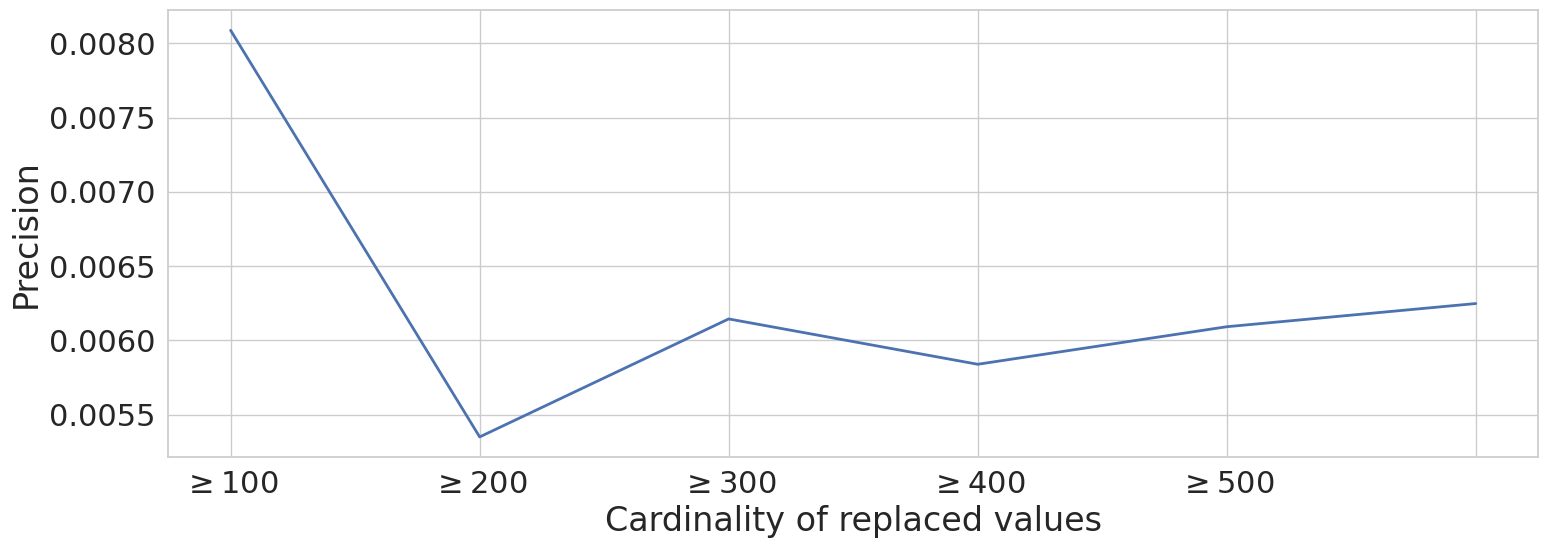

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
fig.canvas.draw()
plt.plot(cardinality_list, precision_list, linewidth=2)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(new_tick_labels)
plt.xlabel('Cardinality of replaced values');plt.ylabel('Precision');plt.tight_layout()
plt.savefig('figures/TUS-I_sherlock_precision.svg')

/home/aristotle/Documents/sherlock-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


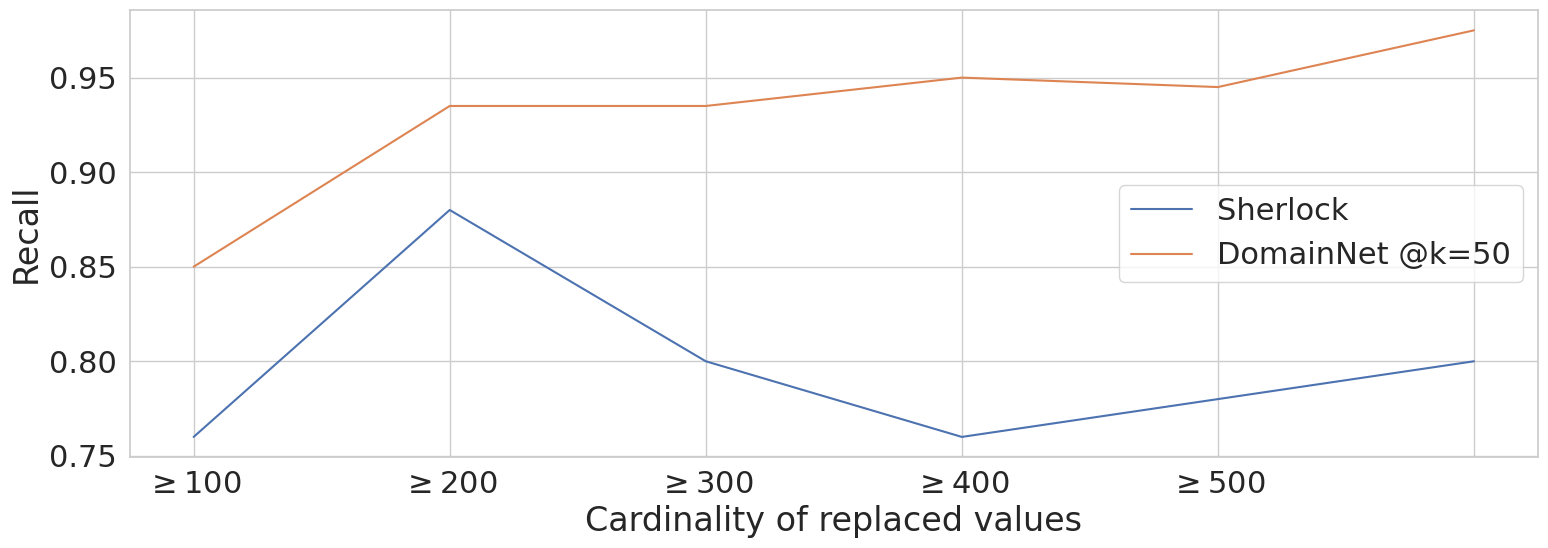

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
fig.canvas.draw()
plt.plot(cardinality_list, recall_list, label='Sherlock')
plt.plot(cardinality_list, domain_net_recall, label='DomainNet @k=50')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(new_tick_labels)
plt.xlabel('Cardinality of replaced values');plt.ylabel('Recall');plt.legend();plt.tight_layout()
plt.savefig('figures/TUS-I_sherlock_recall.svg')

/home/aristotle/Documents/sherlock-project/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


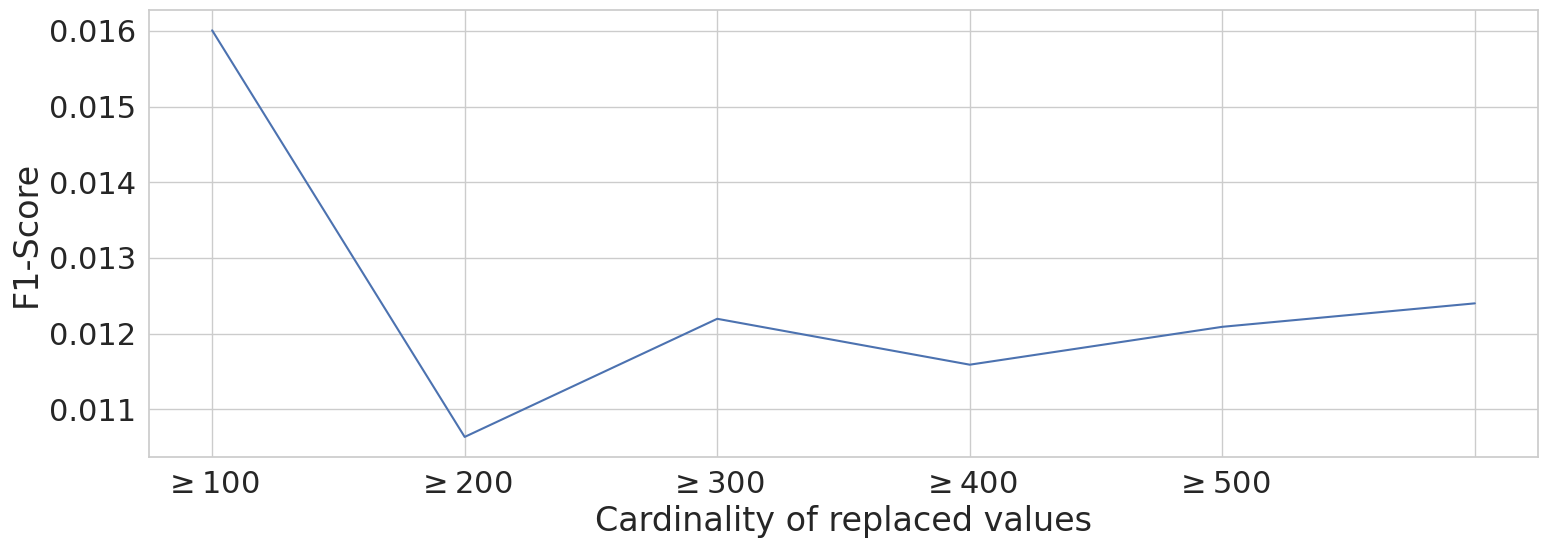

In [23]:
fig, ax = plt.subplots(figsize=(16,6))
fig.canvas.draw()
plt.plot(cardinality_list, f1_score_list, label='Sherlock')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(new_tick_labels)
plt.xlabel('Cardinality of replaced values');plt.ylabel('F1-Score');plt.tight_layout()
plt.savefig('figures/TUS-I_sherlock_f1_score.svg')